# Imports

In [88]:
import io
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import cv2
import seaborn as sn
from PIL import Image
import requests

# Loading the dataset and dividing it into trainign and test batches

In [89]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print("The size of training dataset and its pixel shape: ", x_train.shape)

The size of training dataset and its pixel shape:  (60000, 28, 28)


### Showing a sample Image

Change the sample variable to change the number to another in the set


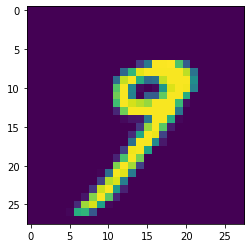

In [90]:
sample = 33;
print("Change the sample variable to change the number to another in the set")
plt.imshow(x_train[sample])
plt.show()

### Displaying the image as black and white

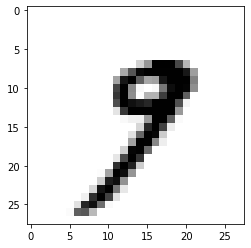

In [91]:
plt.imshow(x_train[sample], cmap = plt.cm.binary)

# Normalization

The image is greyscaled, has values that range from 0 - 255, 0 being black and 255 being white. For Training we need to convert this to a 0 - 1 range. 

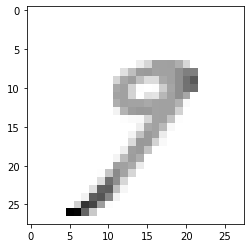

In [92]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[sample], cmap = plt.cm.binary)

Checking to see if the image has the proper label

In [93]:
print(y_train[sample])

9


## Resizing the Image

For a Convolutional Neural Network (CNN), a 4D array must be the input. This means the input has to be in the form of [batch_size, height, width, depth]. Since we have greyscaled the image, the depth will always be 1, and setting the batch size to -1 will return the length of the dataset

In [94]:
IMG_SIZE=28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training Samples dimension", x_trainr.shape)
print("Testing Samples dimension", x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


# Creating the Neural Network

#### Creating the network

In [95]:
model = Sequential()

#### Creating the First Convolution Layer

We use 64 because that is the number of filters, (3,3) because that is the size of each kernel and for the first convolution layer we have to specify the input size

In [96]:
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#### Creating the Second Convolution Layer

In [97]:
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#### Creating the Third Convolution Layer

In [98]:
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#### Fully connecting Layer 1

In [99]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#### Fully connecting Layer 2

In [100]:
model.add(Dense(32))
model.add(Activation("relu"))

#### Fully connecting Layer 3

The output layer must be equal to the number of classes

In [101]:
model.add(Dense(10))
model.add(Activation("softmax"))

#### Summary of the model

In [102]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_7 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

#### Defining the optimizer, the loss function and the metrics

In [103]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# Training the Model

#### To prefent overfitting and underfitting, 5 epochs are used since the images are relatively simple

In [104]:
model.fit(x_trainr, y_train, epochs=5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 26s 19ms/step - loss: 0.3236 - accuracy: 0.8980 - val_loss: 0.1211 - val_accuracy: 0.9603
Epoch 2/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0968 - accuracy: 0.9706 - val_loss: 0.1195 - val_accuracy: 0.9624
Epoch 3/5
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0711 - accuracy: 0.9779 - val_loss: 0.0684 - val_accuracy: 0.9787
Epoch 4/5
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0532 - accuracy: 0.9831 - val_loss: 0.0708 - val_accuracy: 0.9789
Epoch 5/5
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0436 - accuracy: 0.9861 - val_loss: 0.0749 - val_accuracy: 0.9784


## Evaluation of the model using test data

In [105]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test Loss on 10,000 test samples", test_loss)
print("Test Accuracy on 10,000 test samples", test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0638 - accuracy: 0.9816
Test Loss on 10,000 test samples 0.06382700800895691
Test Accuracy on 10,000 test samples 0.9815999865531921


313/313 [==============================] - 2s 5ms/step
8


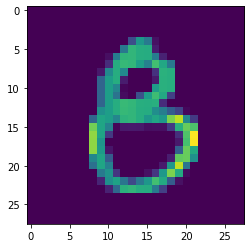

In [106]:
test = 800
predictions = model.predict([x_testr])
plt.imshow(x_test[test])
score = tf.nn.softmax(predictions[0])
print(np.argmax(predictions[test]))

# Evaluation using a Confusion Matrix

In [107]:
predicted_labels = [np.argmax(i) for i in predictions]
predicted_labels[:5]

[7, 2, 1, 0, 4]

Text(69.0, 0.5, 'Truth')

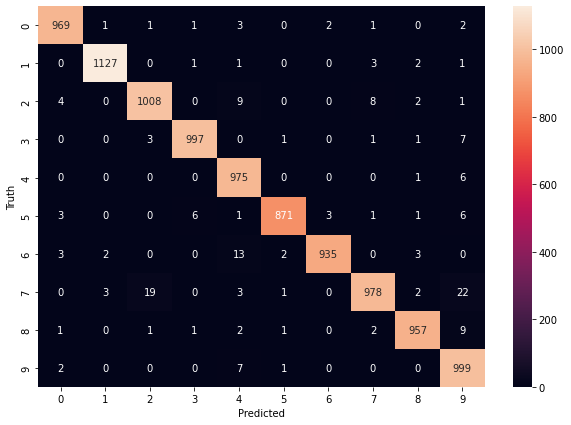

In [108]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=predicted_labels)
cm;
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Testing using User Created Data

1/1 [==============================] - 0s 17ms/step
This image most likely is 1 with a 21.50 percent confidence.


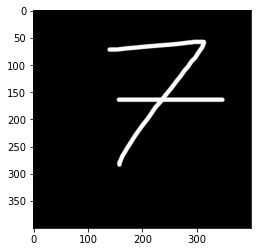

In [127]:
img = cv2.imread('Test_Data/seven_3.png')
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converting the image to greyscale
#plt.imshow(gray)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA) #resizing the image to 28x28
#plt.imshow(resized)
newimg = tf.keras.utils.normalize(resized, axis = 1) #Changing the 0-255 range to 0-1
#plt.imshow(newimg)
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #Changing it into a 4D input
predictions = model.predict(newimg)
score = tf.nn.softmax(predictions[0])
print("This image most likely is {} with a {:.2f} percent confidence."
    .format(np.argmax(predictions[0]), 100 * np.max(score)))